# Statistical plots and Distribution Analysis
This project focuses on statistical distribution analysis of sales data.
Using histograms, KDEs, and boxplots, the project explores data spread, skewness, and outliers, and compares distributions across different business groups such as regions and customer segments.

In [2]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# loading the dataset
df = pd.read_csv("sales_df.csv")

In [4]:
# Checking first five rows
df.head()

,Order_Line,Order_ID,Bar_code_value,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Product_ID,Sales,Quantity,...,Segment,Age,Country,City,State,Postal_Code,Region,Order_Year,Order_Month,Order_Month_Name
0,7952,OF-2023-164959,98365963,2025-01-01,2025-01-05,Standard Class,KN-16390,OFF-LA-10004272,8.67,3,...,Corporate,43,United States,Los Angeles,California,90004.0,West,2025,1,Jan
1,7953,OF-2023-156818,78358033,2025-01-01,2025-01-03,Second Class,JD-16015,TEC-AC-10002323,132.60,6,...,Consumer,23,United States,Chicago,Illinois,60610.0,Central,2025,1,Jan
2,7954,OF-2023-127656,29106221,2025-01-01,2025-01-07,Standard Class,NW-18400,OFF-AR-10001166,30.32,4,...,Consumer,29,United States,Tigard,Oregon,97224.0,West,2025,1,Jan
3,7955,OF-2023-162015,64360984,2025-01-01,2025-01-08,Standard Class,KB-16240,TEC-AC-10003832,1287.45,5,...,Corporate,42,United States,Los Angeles,California,90036.0,West,2025,1,Jan
4,7956,OF-2023-162015,13758768,2025-01-01,2025-01-08,Standard Class,KB-16240,OFF-AP-10003040,168.10,5,...,Corporate,42,United States,Los Angeles,California,90036.0,West,2025,1,Jan


In [5]:
#chceking information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_Line        9999 non-null   int64  
 1   Order_ID          9999 non-null   object 
 2   Bar_code_value    9999 non-null   int64  
 3   Order_Date        9999 non-null   object 
 4   Ship_Date         9999 non-null   object 
 5   Ship_Mode         9999 non-null   object 
 6   Customer_ID       9999 non-null   object 
 7   Product_ID        9999 non-null   object 
 8   Sales             9999 non-null   float64
 9   Quantity          9999 non-null   int64  
 10  Discount          9999 non-null   float64
 11  Profit            9999 non-null   float64
 12  Customer_Name     9999 non-null   object 
 13  Segment           9999 non-null   object 
 14  Age               9999 non-null   int64  
 15  Country           9999 non-null   object 
 16  City              9999 non-null   object 


In [6]:
# checking summary statistics
df.describe()

,Order_Line,Bar_code_value,Sales,Quantity,Discount,Profit,Age,Postal_Code,Order_Year,Order_Month
count,9999.000000,9.999000e+03,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,5000.000000,5.003961e+07,229.880712,3.789779,0.156325,28.677304,44.434743,55320.320732,2023.354635,5.993199
std,2886.607005,2.887062e+07,623.131990,2.225894,0.206608,234.216468,15.670604,31466.920809,1.212246,3.338920
min,1.000000,2.428400e+04,0.444000,1.000000,0.000000,-6599.978000,18.000000,1841.000000,2021.000000,1.000000
25%,2500.500000,2.496490e+07,17.280000,2.000000,0.000000,1.727100,31.000000,27405.000000,2022.000000,3.000000
50%,5000.000000,5.014836e+07,54.500000,3.000000,0.200000,8.662000,45.000000,55901.000000,2023.000000,5.000000
75%,7499.500000,7.508131e+07,209.955000,5.000000,0.200000,29.364000,59.000000,90004.000000,2024.000000,9.000000
max,9999.000000,9.999855e+07,22638.480000,14.000000,0.800000,8399.976000,70.000000,99207.000000,2025.000000,12.000000


#### Data Summary & Interpretation
From the results above:
The dataset contains 9,999 sales transactions from 2021 to 2025, covering multiple customer regions and segments.
Sales and Profit: Both are highly variable and right-skewed, with most orders generating modest revenue but a few very high-value sales and extreme 
profits or losses. 

The median profit (≈8.66) is much lower than the mean (≈28.68), indicating the presence of extreme outliers.
Quantity and Discount: Most orders consist of 1–5 units, and discounts are generally low, although some orders receive up to 80% off.
Time Variables (Order_Year, Order_Month): Orders are spread fairly evenly across months and years, enabling monthly, quarterly, and yearly 
aggregation for trend analysis.
Customer Age: Ranges from 18–70 with a fairly symmetric distribution (mean ≈44), suitable for segment-level analyses.

Key Takeaways: The dataset contains sufficient variation for insightful analysis. Outliers in sales and profit require attention via boxplots and 
distribution plots, while aggregated time and categorical variables allow for meaningful comparisons across regions, segments, and shipping modes.

In [8]:
# showing only columns with missing values
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

## Distribution of Sales (Histogram + KDE)
What this shows:

Overall sales distribution
Skewness and spread
Presence of extreme values

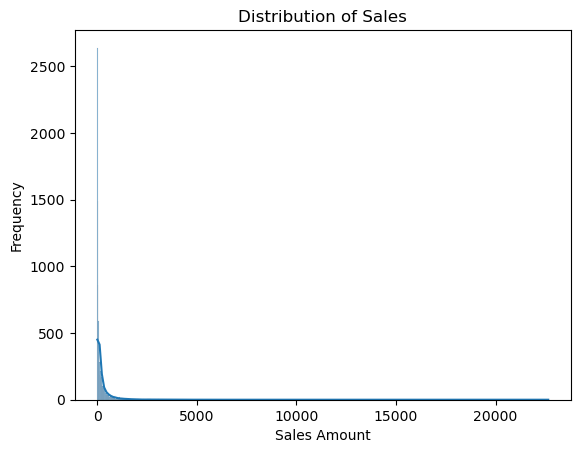

In [10]:
plt.figure()
sns.histplot(df['Sales'], kde=True)
plt.title("Distribution of Sales")
plt.xlabel("Sales Amount")
plt.ylabel("Frequency")
plt.savefig("sales_distribution.png")
plt.show()

### **Sales Distribution Interpretation:**  
The sales distribution is right-skewed, indicating that while most transactions are moderate, a few very high-value sales increase the mean. 
Boxplots and further analysis will help detect these outliers.

## Distribution of Profit (Histogram + KDE)
Purpose:

Identify negative profit
Check if profit is skewed or symmetric

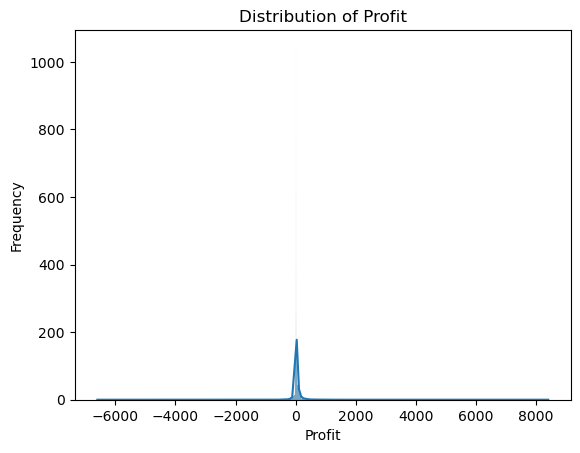

In [13]:
plt.figure()
sns.histplot(df['Profit'], kde=True)
plt.title("Distribution of Profit")
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.savefig("profit_distribution.png")
plt.show()


**Profit Distribution Interpretation:**  
Profit shows extreme variability, with some large losses and high gains. 
Median profit is much lower than mean, highlighting outliers and skewness in the data.

## Boxplot for Outlier Detection (Sales and Profit)
Purpose:

Detect extreme sales and profit values

Understand spread and interquartile range

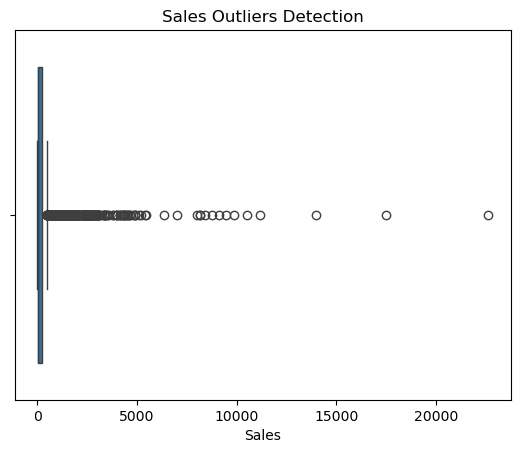

In [16]:
plt.figure()
sns.boxplot(x=df['Sales'])
plt.title("Sales Outliers Detection")
plt.savefig("sales_boxplot.png")
plt.show()


**Sales Outliers Boxplot Interpretation:**  
The boxplot shows most sales clustered at the lower end of the scale, with the whisker extending close to zero for very small orders. 
A few high-value sales appear as individual points on the right, representing outliers. This confirms that the sales distribution is right-skewed, 
with a long tail of large transactions that increase the mean above the median.

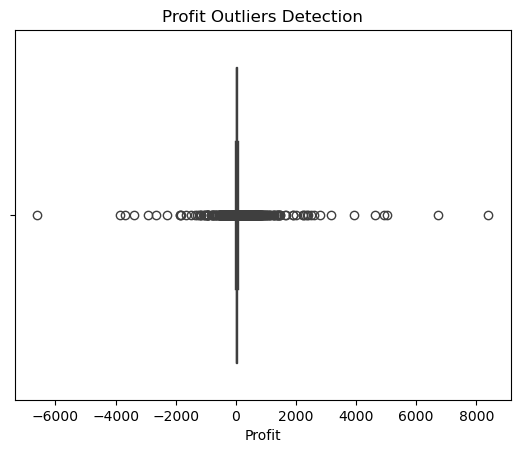

In [18]:
plt.figure()
sns.boxplot(x=df['Profit'])
plt.title("Profit Outliers Detection")
plt.savefig("Profit_boxplot.png")
plt.show()


**Profit Outliers Boxplot Interpretation:**  
The boxplot shows that most profit values are clustered around modest gains, with the interquartile range representing the bulk of typical transactions. However, there are extreme points both below zero (large losses) and above the upper whisker (exceptionally high profits), indicating outliers. This confirms that profit distribution is right-skewed overall, but with a few negative values reflecting loss-making orders. These outliers significantly affect the mean, making the median a better measure of typical profitability.

## Compare Sales Distributions Across Groups

What this answers:

Which regions have higher variability?

Which region has more outliers?

✅ This will generate three boxplots for Sales:
Sales by Region
Sales by Segment
Sales by Ship_Mode

C:\Users\HP\AppData\Local\Temp\ipykernel_42564\3885477594.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=group, y=target, data=df, palette='pastel')


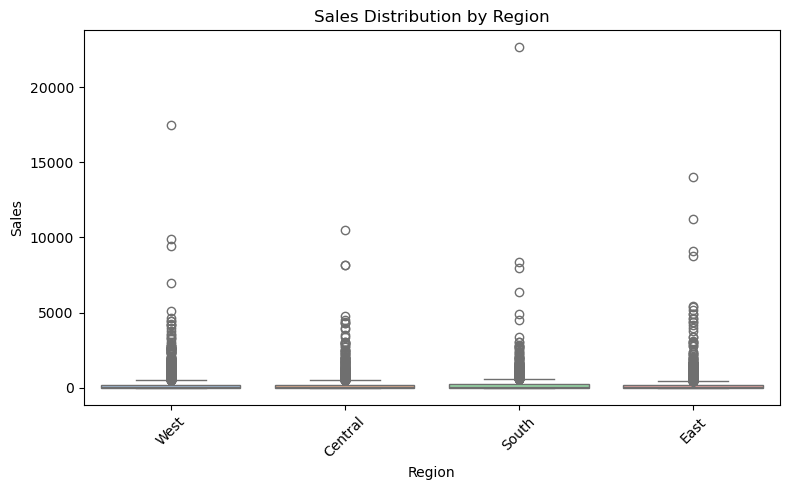

C:\Users\HP\AppData\Local\Temp\ipykernel_42564\3885477594.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=group, y=target, data=df, palette='pastel')


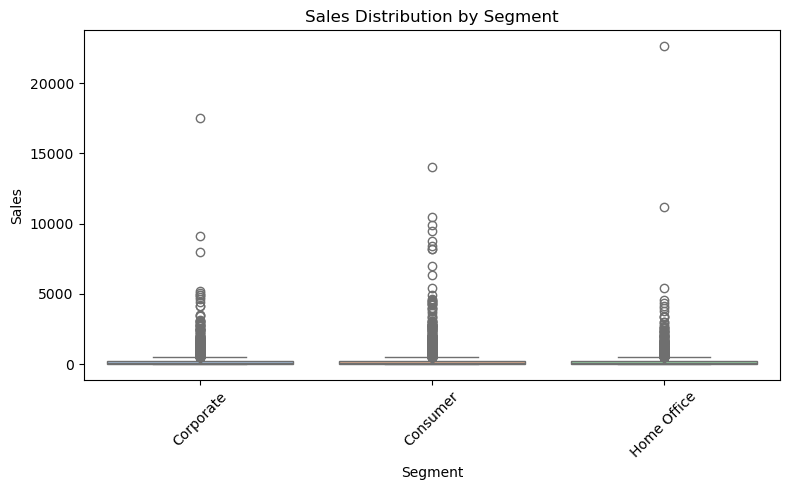

C:\Users\HP\AppData\Local\Temp\ipykernel_42564\3885477594.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=group, y=target, data=df, palette='pastel')


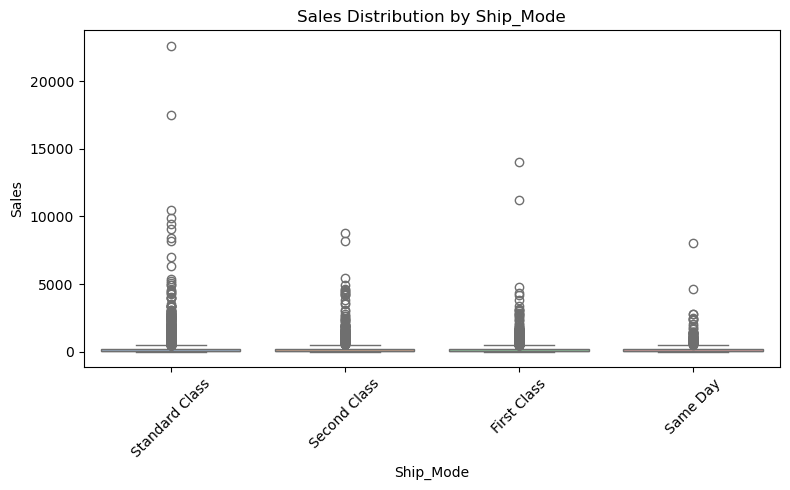

In [21]:
# Ensure outputs folder exists
os.makedirs("outputs", exist_ok=True)

group_cols = ['Region', 'Segment', 'Ship_Mode']
target = 'Sales'  # Focus only on Sales

for group in group_cols:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=group, y=target, data=df, palette='pastel')
    plt.title(f"{target} Distribution by {group}")
    plt.xlabel(group)
    plt.ylabel(target)
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    filename = f"outputs/{target}_by_{group}.png".replace(" ", "_")
    plt.savefig(filename)
    plt.show()

### Sales Distribution Analysis

**Sales by Region:**  
The boxplots show that sales vary across regions. The West region exhibits a wider spread with some very high-value transactions, indicating more variability in order sizes. The Central and South regions have more concentrated sales around the median.

**Sales by Segment:**  
Home Office segment sales show the largest range and several high-value orders, while Corporate and Consumer segments are more consistent, with smaller variability. This suggests that individual Home Office occasionally place large orders, impacting overall revenue.

**Sales by Shipping Mode:**  
Sales across different shipping modes show minor differences, but the Standard Class mode occasionally includes higher-value orders. Second Class  and and Same Day orders are more frequent but moderate in value.

**Key Takeaways for Sales:**  
- The sales distributions are right-skewed across most groups.  
- Outliers exist, particularly in the West region and Home Office segment.  
- Understanding these patterns helps identify where high-value orders occur and informs sales strategy.

## Compare Profit Distributions Across Groups(Regions, Segments, Ship mode)

Purpose:

Compare profitability spread

Identify risky segments

✅ This will generate three boxplots for Profit:
Profit by Region
Profit by Segment
Profit by Ship_Mode

C:\Users\HP\AppData\Local\Temp\ipykernel_42564\866774112.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=group, y=target, data=df, palette='pastel')


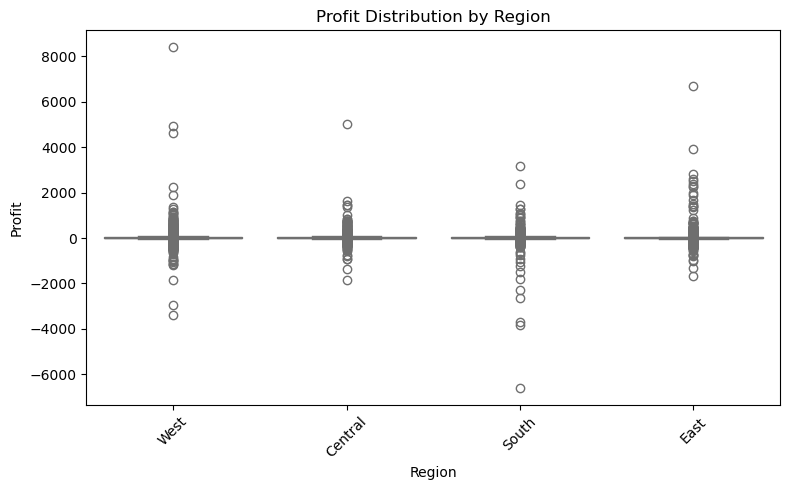

C:\Users\HP\AppData\Local\Temp\ipykernel_42564\866774112.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=group, y=target, data=df, palette='pastel')


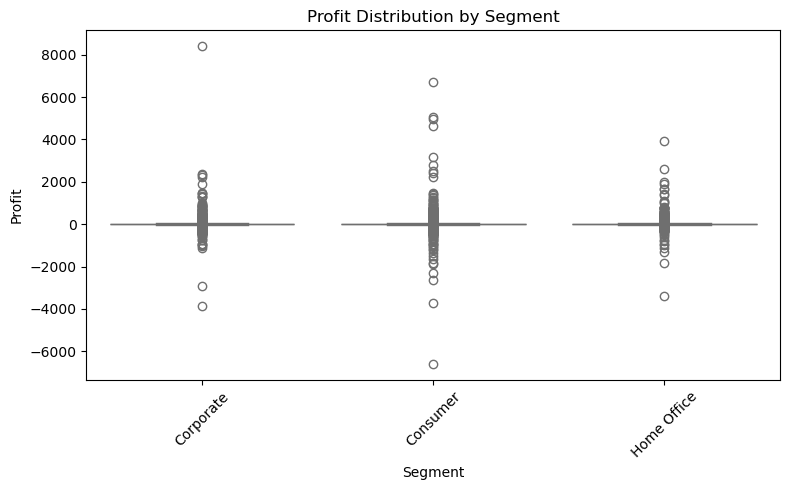

C:\Users\HP\AppData\Local\Temp\ipykernel_42564\866774112.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=group, y=target, data=df, palette='pastel')


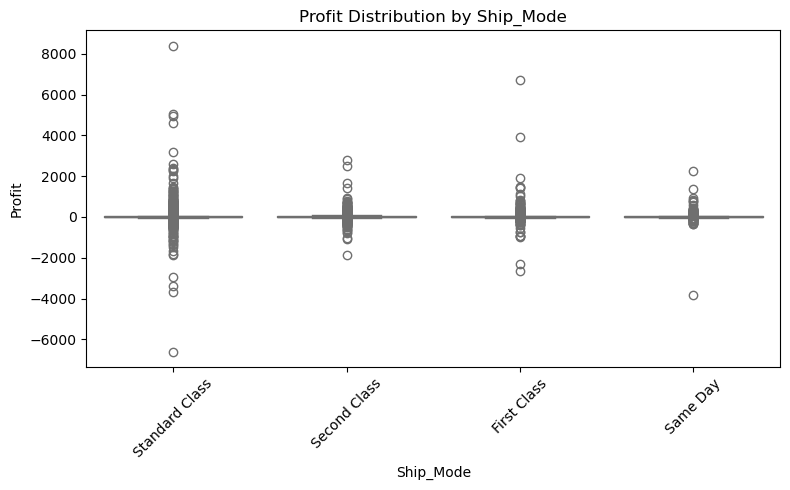

In [24]:
target = 'Profit'  # Focus only on Profit

for group in group_cols:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=group, y=target, data=df, palette='pastel')
    plt.title(f"{target} Distribution by {group}")
    plt.xlabel(group)
    plt.ylabel(target)
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    filename = f"outputs/{target}_by_{group}.png".replace(" ", "_")
    plt.savefig(filename)
    plt.show()

### Profit Distribution Analysis

**Profit by Region:**  
Profit variability mirrors sales patterns, with the West region showing both very high profits and occasional losses. The Central and South regions are more stable.

**Profit by Segment:**  
The Corporate segment exhibits both significant profits and losses, indicating riskier but potentially higher-return orders. Home Office and consumers segments are more consistent, suggesting stable profitability.

**Profit by Shipping Mode:**  
Profit differences across shipping modes are visible but less pronounced than sales. standard Class shipping has occasional high profits, while Same Day and Second Class are more stable.

**Key Takeaways for Profit:**  
- Profit distributions are right-skewed with extreme outliers.  
- Outliers may represent either exceptionally profitable or loss-making orders.  
- Boxplots highlight areas of high variability, which are important for risk assessment.

## KDE Comparison of Regions

Purpose:

Compare distribution shape

Identify differences in spread and central tendency

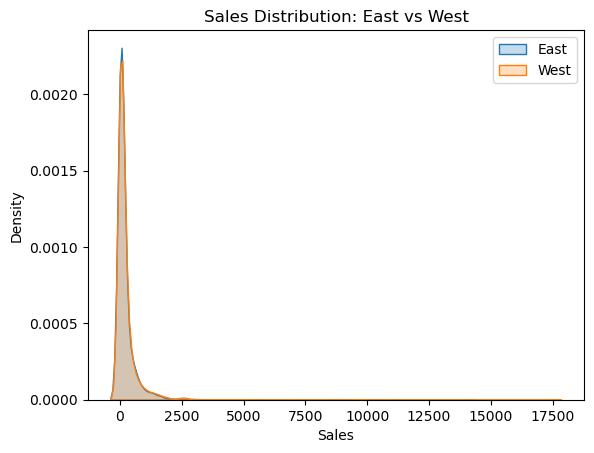

In [27]:
plt.figure()
sns.kdeplot(
    data=df[df['Region'] == 'East']['Sales'],
    label='East',
    fill=True
)
sns.kdeplot(
    data=df[df['Region'] == 'West']['Sales'],
    label='West',
    fill=True
)
plt.title("Sales Distribution: East vs West")
plt.legend()
plt.savefig("kde_east_vs_west.png")
plt.show()


**Focused Comparison (East vs West):**  
The KDE plot highlights differences in spread between East and West regions. West shows a wider range of sales, 
indicating higher variability in order sizes,while East is more consistent.

## Outlier Detection (IQR Method)
Purpose:

Programmatic outlier detection

Support visual findings

In [30]:
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Sales'] < Q1 - 1.5 * IQR) | (df['Sales'] > Q3 + 1.5 * IQR)]
outliers.head()

,Order_Line,Order_ID,Bar_code_value,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Product_ID,Sales,Quantity,...,Segment,Age,Country,City,State,Postal_Code,Region,Order_Year,Order_Month,Order_Month_Name
3,7955,OF-2023-162015,64360984,2025-01-01,2025-01-08,Standard Class,KB-16240,TEC-AC-10003832,1287.450,5,...,Corporate,42,United States,Los Angeles,California,90036.0,West,2025,1,Jan
20,7972,ON-2023-161935,80417948,2025-01-04,2025-01-08,Standard Class,JL-15835,TEC-PH-10000560,1889.946,9,...,Consumer,57,United States,Mission Viejo,California,92691.0,West,2025,1,Jan
30,7982,OF-2023-164378,75236465,2025-01-05,2025-01-08,Second Class,MM-18055,FUR-CH-10002084,664.146,6,...,Consumer,19,United States,Seattle,Washington,98115.0,West,2025,1,Jan
33,7985,ON-2023-128951,43503608,2025-01-05,2025-01-07,First Class,RS-19420,FUR-TA-10004575,872.940,3,...,Corporate,44,United States,Seattle,Washington,98115.0,West,2025,1,Jan
38,7990,ON-2023-152842,10348497,2025-01-06,2025-01-13,Standard Class,NF-18385,TEC-PH-10001944,875.700,6,...,Consumer,23,United States,Jackson,Mississippi,39212.0,South,2025,1,Jan


**Outlier Detection:**  
Using the IQR method, we detect extreme sales values that lie beyond 1.5 times the interquartile range. 
These orders will influence overall summary statistics and require consideration during analysis.

In [49]:
summary_text = """
The sales and profit distributions show right-skewed patterns with noticeable outliers. 
Quantity and discounts are mostly low, while customer age is fairly symmetric. 
Regional and segment-based comparisons reveal differences in variability and profitability, which will guide further analysis and visualization.
"""

with open("distribution_summary.txt", "w") as f:
    f.write(summary_text)
print("Summary file saved successfully")

Summary file saved successfully
